# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


<font size = "5">

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset


<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset

In [2]:
financial = pd.read_csv("data_raw/financial.csv")
financial["date"] = pd.to_datetime(financial["date_str"])
financial = financial.sort_values("date",ascending = True)

<font size = "5">

(b) Line plots from multiple columns with a legend

Text(0.5, 1.0, 'The evolution of the stock market')

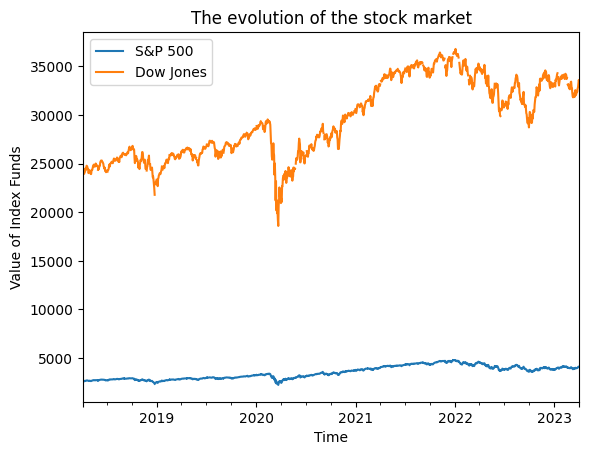

In [5]:
financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])
plt.title("The evolution of the stock market")

<font size = "5">


(c) Compute growth rates for a time series

In [6]:
financial["diff_djia"]   = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]

<font size = "5">

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22

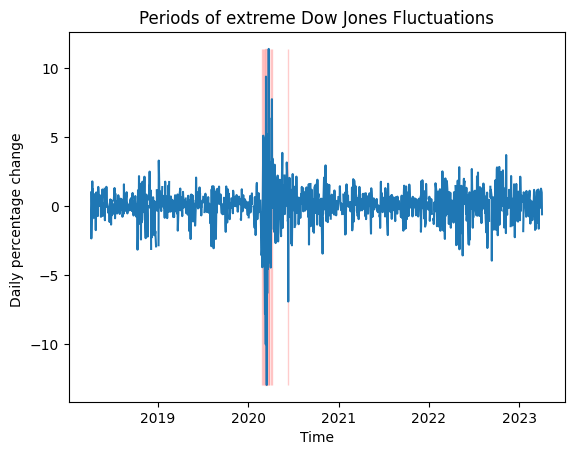

In [7]:
financial["bool_djia"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

# Create a line plot
plt.plot("date", "growth_djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Periods of extreme Dow Jones Fluctuations")

# Add shaded region
vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_djia"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

(e) Compute aggregate dataset by time period

In [11]:
month_config = pd.Grouper(key='date', freq='m')
monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

display(monthlydata)

,date,sp500_mean
0,2018-04-30,2659.463158
1,2018-05-31,2701.493636
2,2018-06-30,2754.352857
3,2018-07-31,2793.643333
4,2018-08-31,2857.820435
...,...,...
56,2022-12-31,3912.380952
57,2023-01-31,3960.656500
58,2023-02-28,4079.684737
59,2023-03-31,3968.559130


<font size = "5">

(f) Convert a dataset to long format

In [9]:
financial["diff_sp500"] = financial["sp500"].diff()
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]


financial_long = pd.melt(financial,
                         var_name   = "series",
                         value_name = "daily_growth",
                         id_vars='date',
                         value_vars=['growth_sp500','growth_djia'])

display(financial_long)

,date,series,daily_growth
0,2018-04-04,growth_sp500,NaN
1,2018-04-05,growth_sp500,0.686281
2,2018-04-06,growth_sp500,-2.192021
3,2018-04-09,growth_sp500,0.333657
4,2018-04-10,growth_sp500,1.672687
...,...,...,...
2605,2023-03-29,growth_djia,0.998171
2606,2023-03-30,growth_djia,0.432275
2607,2023-03-31,growth_djia,1.263336
2608,2023-04-03,growth_djia,0.982745
